# Analysis of Profit Share and Customer Profile of Two Cab Companies

In this project, we are given several datasets pertaining to two cab companies (yellow and pink) operating across several US cities and their customer profile. We will draw insights from the data and try to answer seven questions:

- Does city population play a role on profit? If it does, which company is more ubiquitous in highly populated cities?
- Are middle aged men the most profitable customer profile? If so, which company do they patronize more? 
- Do people travel more during summer months? Which company attracts more customers during busiest months?
- Which company dominates the industry?
- Which company's customers are more loyal?
- Do people earning more bring in more profit? If so, which company attracts these people more?
- Do people earning more use cabs more frequently? If so, which company these people prefer more?

Our goal is to make a recommendation to XYZ company on which company they should invest in based on the answers to these questions.

First we need to combine the given datasets, clean the data if necessary and explore the data:

## Combining The Datasets:

In [142]:
import pandas as pd

cab = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab.head

<bound method NDFrame.head of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52  

In [143]:
cab.shape

(359392, 7)

In [144]:
city = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city.shape

(20, 3)

In [145]:
customer = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
customer.head()
customer.shape

(49171, 4)

In [146]:
transaction = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
transaction.head()
transaction.shape

(440098, 3)

In [147]:
cab_city = pd.merge(cab, city, on='City')
cab_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [148]:
cab_city_transaction = pd.merge(cab_city, transaction, on='Transaction ID')
cab_city_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


In [149]:
df = pd.merge(cab_city_transaction, customer, on='Customer ID')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


## Cleaning The Data:

Converting the "Date of Travel" column to datetime object:

In [150]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date of Travel'])
print(df['Date of Travel'].min())
print(df['Date of Travel'].max())
df_sorted=df.sort_values(by='Date of Travel')
df_sorted.head(50)

42371
43465


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date
12812,10000429,42371,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,"248,968","80,021",57474,Card,Male,34,16558,1970-01-01 00:00:00.000042371
43828,10000525,42371,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,"1,955,130","164,468",4551,Cash,Male,19,6316,1970-01-01 00:00:00.000042371
297325,10001234,42371,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,"671,238","25,063",38146,Cash,Male,36,6577,1970-01-01 00:00:00.000042371
316639,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,"418,859","127,001",53048,Card,Male,23,31566,1970-01-01 00:00:00.000042371
171893,10000927,42371,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,"8,405,837","302,149",1808,Cash,Male,59,18999,1970-01-01 00:00:00.000042371
111181,10000721,42371,Yellow Cab,LOS ANGELES CA,19.20,529.23,246.5280,"1,595,037","144,132",8117,Cash,Male,21,5946,1970-01-01 00:00:00.000042371
316506,10001303,42371,Yellow Cab,WASHINGTON DC,41.07,855.57,522.4104,"418,859","127,001",51417,Cash,Male,30,4042,1970-01-01 00:00:00.000042371
43731,10000519,42371,Yellow Cab,CHICAGO IL,13.92,327.23,185.4144,"1,955,130","164,468",4429,Cash,Male,20,23387,1970-01-01 00:00:00.000042371
270976,10000163,42371,Pink Cab,PHOENIX AZ,4.44,71.57,48.8400,"943,999","6,133",22557,Cash,Male,38,8808,1970-01-01 00:00:00.000042371
270977,10000164,42371,Pink Cab,PHOENIX AZ,8.55,114.15,89.7750,"943,999","6,133",22469,Card,Male,37,4378,1970-01-01 00:00:00.000042371


In [151]:
from datetime import datetime
import xlrd


python_date_min = datetime(*xlrd.xldate_as_tuple(df['Date of Travel'].min(), 0))
python_date_max = datetime(*xlrd.xldate_as_tuple(df['Date of Travel'].max(), 0))
print('Earliest date is ', python_date_min)
print('Latest date is ', python_date_max)

Earliest date is  2016-01-02 00:00:00
Latest date is  2018-12-31 00:00:00


The earliest date in the dataset is 1/2/2016 , but instructions for the project asks for the time frame to be between 31/01/2016 and 31/12/2018. So we will filter the dataset to include only the data pertaining to the asked time frame. 

In [152]:
df = df[df['Date of Travel']>=42400]
df.shape

(355032, 15)

Let us see if the correct dates are chosen:

In [153]:

python_date_min = datetime(*xlrd.xldate_as_tuple(df['Date of Travel'].min(), 0))
python_date_max = datetime(*xlrd.xldate_as_tuple(df['Date of Travel'].max(), 0))
print('Earliest date is ', python_date_min)
print('Latest date is ', python_date_max)

Earliest date is  2016-01-31 00:00:00
Latest date is  2018-12-31 00:00:00


Let us convert 'Date of Travel' column values to datetime objects and add this as a new column named 'Date'.

In [154]:
new = []
for i in range(len(df)):
    new.append(datetime(*xlrd.xldate_as_tuple(df['Date of Travel'].iloc[i], 0)))
df['Date'] = new

In [155]:
df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2018-07-21
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2018-11-23
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2018-04-21
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701",27703,Cash,Male,27,9237,2018-05-04
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,"814,885","24,701",27703,Card,Male,27,9237,2018-10-27


Let us get rid of 'Date of Travel' column as we don't need it anymore.

In [156]:
df.drop(['Date of Travel'], axis=1, inplace=True)
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2018-07-21
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2018-11-23
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2018-04-21
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701",27703,Cash,Male,27,9237,2018-05-04
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,"814,885","24,701",27703,Card,Male,27,9237,2018-10-27


"Population" and "Users" column values are string, we need to convert them to integers. We will use the following function:

In [157]:
def clean_string(row):
    hold = row.rstrip(' ').lstrip(' ').split(',')
    number = ''
    for i in range(len(hold)):
        
        number += hold[i]
    return int(number)

In [158]:
df['Population'] = df['Population'].apply(clean_string)
df['Users'] = df['Users'].apply(clean_string)
df.shape

(355032, 14)

# Hypothesis 1: Does City Population Play a Role on Profit?
We believe cab companies would make more profit in more populous cities. Let us see if there is any correlation between the population of a city and the profit made by the companies in that city. If there is, we will explore which cab company is more dominant in the most populous cities to make a recommendation to XYZ firm.

The dataset gives us the cost of each trip, the price charged, and the distance travelled for that trip. We can calculate the profit made  for each trip:

In [19]:
df['Profit'] = round(df['Price Charged'] - df['Cost of Trip'], 2)
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Profit
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-21,281.28
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-23,194.65
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-21,253.98
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash,Male,27,9237,2018-05-04,50.89
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card,Male,27,9237,2018-10-27,25.10


Let us calculate the average profit made in each city and display it.

In [20]:
city_profit = df.groupby('City')['Profit'].mean().round(2)
city_profit_df = pd.DataFrame(city_profit).reset_index()
city_profit_df.sort_values(['Profit'], inplace=True)
city_profit_df.head()

,City,Profit
13,SACRAMENTO CA,47.84
8,NASHVILLE TN,49.08
2,BOSTON MA,58.87
3,CHICAGO IL,58.87
12,PITTSBURGH PA,63.80


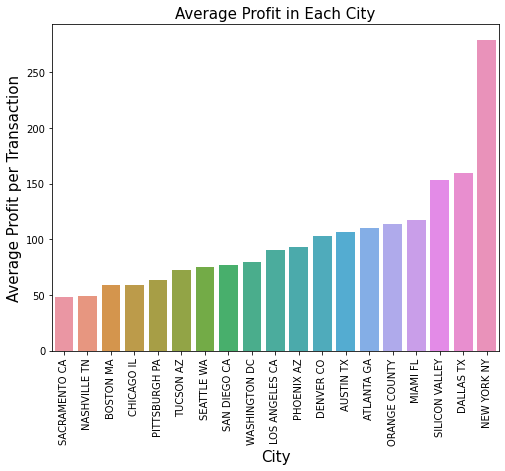

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

sns.barplot(x=city_profit_df['City'],y=city_profit_df['Profit'])
plt.xlabel('City',fontsize=15)
plt.ylabel('Average Profit per Transaction',fontsize=15)
plt.title('Average Profit in Each City',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Let us look at which cities are more populous:

In [22]:
city_pop= pd.merge(city, city_profit_df, on='City')
city_pop['Population'] = city_pop['Population'].apply(clean_string)
city_pop['Users'] = city_pop['Users'].apply(clean_string)
city_pop.head()

,City,Population,Users,Profit
0,NEW YORK NY,8405837,302149,279.17
1,CHICAGO IL,1955130,164468,58.87
2,LOS ANGELES CA,1595037,144132,90.68
3,MIAMI FL,1339155,17675,117.11
4,SILICON VALLEY,1177609,27247,153.69


In [23]:
city_pop.sort_values(by='Population', inplace=True)
city_pop.head()

,City,Population,Users,Profit
18,BOSTON MA,248968,80021,58.87
17,NASHVILLE TN,327225,9270,49.08
16,WASHINGTON DC,418859,127001,79.36
15,PITTSBURGH PA,542085,3643,63.80
14,SACRAMENTO CA,545776,7044,47.84


Let us find out the correlation between the population of a city and the profit made in that city.

In [24]:
import scipy 
r, p = scipy.stats.pearsonr(city_pop['Population'], city_pop['Profit'])
"Correlation between the population of the city and the profit is {}".format(round(r,2))

'Correlation between the population of the city and the profit is 0.83'

Apparently, the more populous the city, the higher profit earned in that city. Let us display this correlation on a graph:

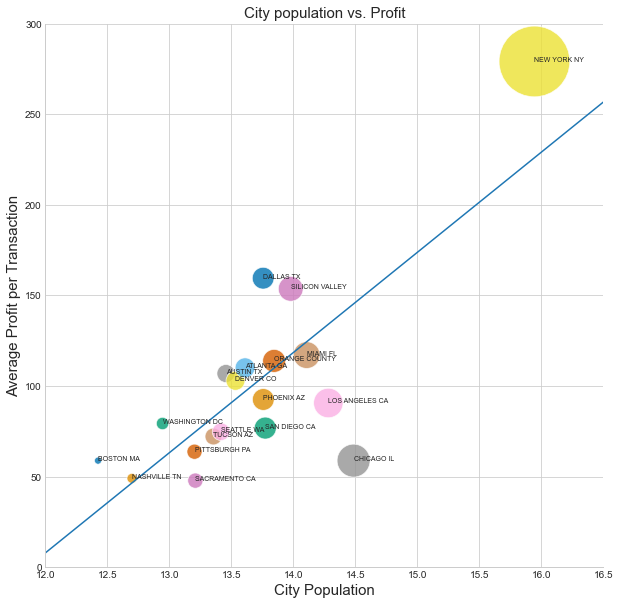

In [25]:
import matplotlib
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
s=sns.scatterplot(x=np.log(city_pop['Population']),y=city_pop['Profit'], hue=city_pop['City'], 
                size=city_pop['Population'],alpha=0.8,  sizes=(50, 5000),palette='colorblind', legend=False)
sns.despine()
s.set(xlim=(12, 16.5))
s.set(ylim=(0,300))
plt.xlabel('City Population', fontsize=15)
plt.ylabel('Average Profit per Transaction', fontsize=15)
plt.title('City population vs. Profit', fontsize=15)
for i in range(len(city_pop)):
    plt.annotate(city_pop['City'].iloc[i], (np.log(city_pop['Population'].iloc[i]), city_pop['Profit'].iloc[i]), size=7)
from scipy import stats

m, b, *_ = stats.linregress(np.log(city_pop['Population']), city_pop['Profit'])
matplotlib.pyplot.axline(xy1=(0, b), slope=m)

plt.show()


We conclude that there is a strong relationship between the population of a city and the profit made in that city. 

In the dataset we are also given the number of customers in each city. We would like to know if the number of customers is a better indicator of the profit. Let us calculate the correlation: 

In [26]:
r, p = scipy.stats.pearsonr(city_pop['Profit'], city_pop['Users'])
"Correlation between the number of customers in a city and the profit is {}".format(round(r,2))

'Correlation between the number of customers in a city and the profit is 0.53'

Let us see the correlation on a graph:

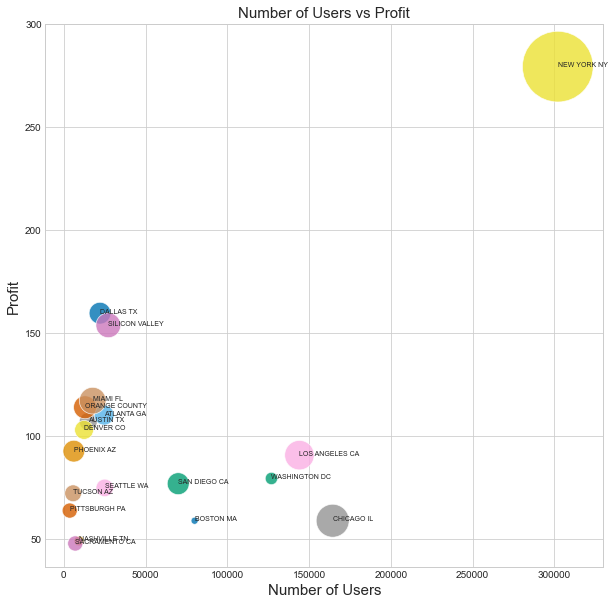

In [27]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x=city_pop['Users'],y=city_pop['Profit'], hue=city_pop['City'], 
                size=city_pop['Population'],alpha=0.8,  sizes=(50, 5000),palette='colorblind', legend=False)
s.set(xlim=(None, 330000))
s.set(ylim=(None,300))
plt.xlabel('Number of Users', fontsize=15)
plt.ylabel('Profit', fontsize=15)
plt.title('Number of Users vs Profit', fontsize=15)
for i in range(len(city_pop)):
    plt.annotate(city_pop['City'].iloc[i], (city_pop['Users'].iloc[i], city_pop['Profit'].iloc[i]), size=7)
plt.show()

Surprisingly, the population of a city is a better indicator of the profit than the number of the customers in that city. One reason for this may be that people in crowded cities may be willing to pay more, due to their assumption of less cabs being available. Now that we established this fact, let us explore which company is more dominant in the most populous cities.

Yellow company's transactions:

In [28]:
yellow = df[df['Company']=='Yellow Cab'][['Population','City', 'Transaction ID']]
yellow_count = yellow.groupby(['City'])['Transaction ID'].count().reset_index()
city_pop = df[['City','Population']].copy()
city_pop.drop_duplicates(inplace=True)
city_pop.reset_index(drop=True, inplace=True)
city_pop_yellow=pd.merge(yellow_count, city_pop, on='City')
city_pop_yellow.rename(columns={'Transaction ID': 'Number of Transactions'}, inplace=True)
city_pop_yellow.sort_values(by='Population', inplace=True)
city_pop_yellow

,City,Number of Transactions,Population
2,BOSTON MA,24195,248968
8,NASHVILLE TN,1160,327225
18,WASHINGTON DC,39452,418859
12,PITTSBURGH PA,624,542085
13,SACRAMENTO CA,1017,545776
17,TUCSON AZ,1121,631442
15,SEATTLE WA,5169,671238
1,AUSTIN TX,3006,698371
5,DENVER CO,2399,754233
0,ATLANTA GA,5715,814885


Pink Company's transactions:

In [29]:
pink = df[df['Company']=='Pink Cab'][['Population','City', 'Transaction ID']]
pink_count = pink.groupby(['City'])['Transaction ID'].count().reset_index()
city_pop_pink = pd.merge(pink_count, city_pop, on='City')
city_pop_pink.rename(columns={'Transaction ID': 'Number of Transactions'}, inplace=True)
city_pop_pink.sort_values(by='Population', inplace=True)
city_pop_pink

,City,Number of Transactions,Population
2,BOSTON MA,5115,248968
8,NASHVILLE TN,1829,327225
18,WASHINGTON DC,3649,418859
12,PITTSBURGH PA,680,542085
13,SACRAMENTO CA,1324,545776
17,TUCSON AZ,792,631442
15,SEATTLE WA,2664,671238
1,AUSTIN TX,1861,698371
5,DENVER CO,1381,754233
0,ATLANTA GA,1741,814885


Let us see performance of both companies in cities across US on a graph:

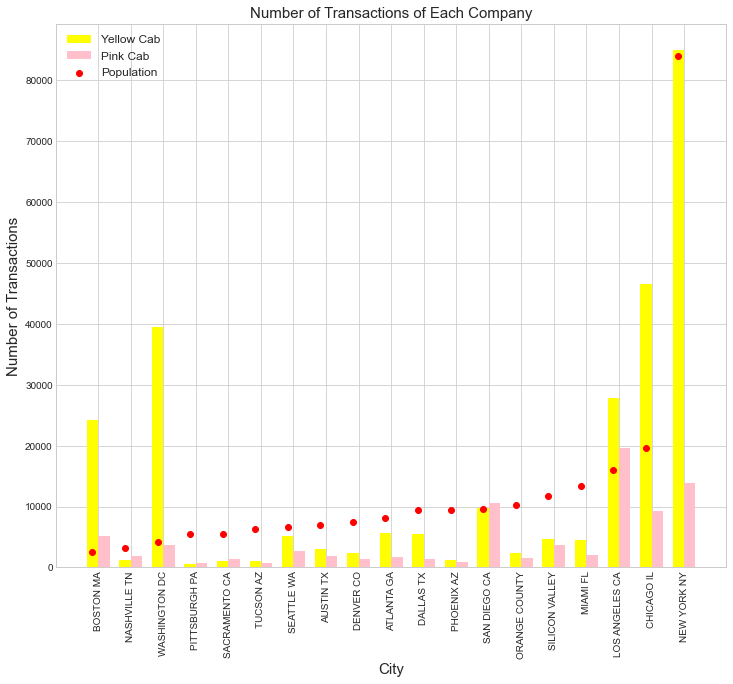

In [30]:
N=19
ind=np.arange(N)
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
yellow= ax.bar(ind, city_pop_yellow['Number of Transactions'], width, color='Yellow')

pink = ax.bar(ind+width,city_pop_pink['Number of Transactions'], width, color='Pink')
pop = ax.scatter(x=city_pop_pink['City'],y=city_pop_pink['Population']/100, color='Red', label='Population')
# add some
ax.set_xlabel('City', fontsize=15)
ax.set_ylabel('Number of Transactions',fontsize=15)
ax.set_title('Number of Transactions of Each Company',fontsize=15)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((city_pop_yellow['City']), rotation=90)

ax.legend( (yellow[0], pink[0], pop), ('Yellow Cab', 'Pink Cab','Population'), framealpha=0.3 , loc='best', fontsize=12)

plt.show()

As we can see from the graph, Yellow Cab Company surpasses Pink Cab Company in the number of transactions in the most populous cities like New York, Chicago and Los Angeles. We would recommend XYZ company to invest in the Yellow Cab Company based on the fact that Yellow Cab Company is much more dominant in the most populous cities than the Pink Cab Company.

## Hypothesis 2: Are Middle Aged Men the Most Profitable Customer Profile? 

We think middle aged men bring in more profit for the companies, as, statistically, they are known to be making more money and travelling more than the rest of the population. Also, due to social norms, they may be more likely to pay the fare when they are travelling with women. Let us see if the data supports this claim:

In [31]:
customers_profit = df[['Customer ID', 'Profit']]
customers_profile = df[['Customer ID', 'Gender', 'Age', 'Income (USD/Month)']]
cust_grouped = customers_profit.groupby('Customer ID')['Profit'].agg(sum)
customer_profit_sum = pd.DataFrame(cust_grouped).reset_index()
customer_profile = pd.merge(customer_profit_sum, customers_profile, on='Customer ID')
customer_profile.drop_duplicates(inplace=True)
customer_profile.head()

,Customer ID,Profit,Gender,Age,Income (USD/Month)
0,1,8423.77,Male,36,16359
29,2,11971.31,Male,31,12069
69,3,11660.32,Female,27,12968
115,4,7543.45,Male,33,13803
140,5,9888.41,Male,24,9965


Let us see if gender plays a role in the profit:

In [32]:
male_profit = customer_profile[customer_profile['Gender']=='Male']['Profit'].sum().round(2)
female_profit = customer_profile[customer_profile['Gender']=='Female']['Profit'].sum().round(2)
male_count = customer_profile[customer_profile['Gender']=='Male']['Gender'].count()
female_count = customer_profile[customer_profile['Gender']=='Female']['Gender'].count()
male = male_profit/male_count
female = female_profit/female_count
print('Total profit coming from males is ${}.'.format(male_profit))
print('Total profit coming from females is ${}.'.format(female_profit))
print('Number of male customers is {}.'.format(male_count))
print('Number of female customers is {}.'.format(female_count))
print('The share of profit collected from each male is ${}'.format(round(male, 2)))
print('The share of profit collected from each female is ${}'.format(round(female,2)))

Total profit coming from males is $28104774.2.
Total profit coming from females is $20384540.97.
Number of male customers is 24556.
Number of female customers is 21464.
The share of profit collected from each male is $1144.52
The share of profit collected from each female is $949.71


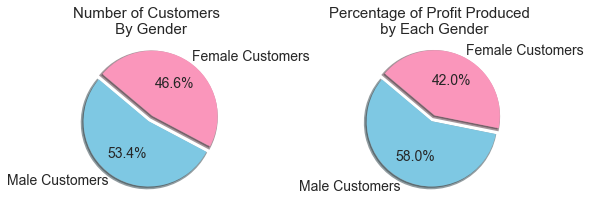

In [33]:

plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
data_count = [male_count, female_count]
colors_count = ['#7ec8e3', '#fa96bb']
labels_count = ['Male Customers', 'Female Customers']
plt.pie(data_count, colors=colors_count, labels=labels_count, 
        autopct='%1.1f%%', shadow=True, startangle=140,
        wedgeprops = {'linewidth': 3}, explode=(0, 0.1),textprops={'fontsize': 14})
plt.title('Number of Customers \n By Gender',fontsize=15)
plt.subplot(1,2,2)
data = [male_profit, female_profit]
colors=['#7ec8e3', '#fa96bb']
labels=['Male Customers', 'Female Customers']
plt.pie(data, colors = colors, labels=labels,autopct='%1.1f%%', 
        shadow=True, startangle=140,wedgeprops = {'linewidth': 3}, explode=(0, 0.1), textprops={'fontsize': 14})
plt.title('Percentage of Profit Produced \n by Each Gender', fontsize=15)
plt.tight_layout()
plt.show()



As we had guessed, more male customers use cab services than females do, as well as generating around $200 more profit per person than their counterparts.

Let us see how age distribution affects profit rates for both genders.

In [34]:
male_customers = customer_profile[customer_profile['Gender']=='Male'].copy()
female_customers = customer_profile[customer_profile['Gender']=='Female'].copy()
male_customers['Age Groups'] = pd.cut(x=male_customers['Age'],bins=[17,30,40,50,66],labels=['18-30','31-40','41-50','51-65'])
female_customers['Age Groups'] = pd.cut(x=female_customers['Age'],bins=[17,30,40,50,66],labels=['18-30','31-40','41-50','51-65'])

Age_groups_male = male_customers.groupby('Age Groups')['Profit'].mean().round(2).reset_index()
Age_groups_female = female_customers.groupby('Age Groups')['Profit'].mean().round(2).reset_index()
Age_groups_female

,Age Groups,Profit
0,18-30,953.57
1,31-40,942.27
2,41-50,987.09
3,51-65,928.40


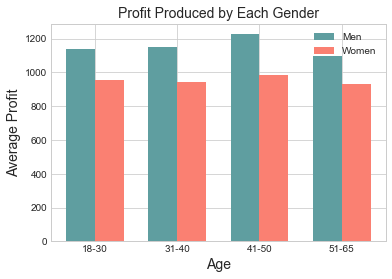

In [35]:

N=4
ind=np.arange(N)
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
male = ax.bar(ind, Age_groups_male['Profit'], width, color='cadetblue')

female = ax.bar(ind+width,Age_groups_female['Profit'], width, color='salmon')

# add some
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Average Profit', fontsize=14)
ax.set_title('Profit Produced by Each Gender', fontsize=14)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((Age_groups_male['Age Groups']))

ax.legend( (male[0], female[0]), ('Men', 'Women'), framealpha=0.3 , loc='best')
plt.show()

From the graph above, we can infer that men ages between 41 and 50 produce more profit than the rest of the groups, proving our hypothesis true. 
Now let us figure out which cab company this customer profile choose more frequently.

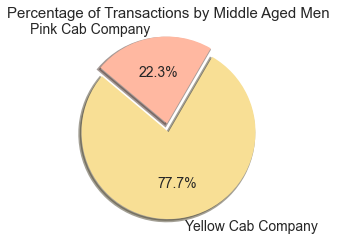

In [38]:
yellow_male=df[(df['Gender']=='Male')&(df['Age']>=41)&(df['Age']<=50)&(df['Company']=='Yellow Cab')]
pink_male=df[(df['Gender']=='Male')&(df['Age']>=41)&(df['Age']<=50)&(df['Company']=='Pink Cab')]
male_yellow_transaction = yellow_male['Transaction ID'].count()
male_pink_transaction = pink_male['Transaction ID'].count()
data = pd.DataFrame( data=[male_yellow_transaction, male_pink_transaction], )
plt.pie(data[0], colors = ['#F8DF95', '#FFB8A1'], labels=['Yellow Cab Company', 'Pink Cab Company'],autopct='%1.1f%%', 
       shadow=True, startangle=140,wedgeprops = {'linewidth': 3}, explode=(0, 0.1),textprops={'fontsize': 14})
plt.title('Percentage of Transactions by Middle Aged Men', fontsize=15)
plt.show()

Since middle aged men is the most profitable customer profile and more than 77% of all transactions by middle aged men is with the Yellow Cab Company, we can confidently advise XYZ company to invest in Yellow Cab Company.

## Hypothesis 3: Do People Travel More during Summer Months?
The cities in the dataset are metropolitan areas, where there may be many tourist attractions. So, people from other cities would visit these cities during summer months increasing number of transactions during those months. Let us see if there is any correlation between the distance traversed by cabs and the month of the year.

In [40]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Profit,Year,Month
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-21,281.28,2018,7
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-23,194.65,2018,11
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-21,253.98,2018,4
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash,Male,27,9237,2018-05-04,50.89,2018,5
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card,Male,27,9237,2018-10-27,25.10,2018,10


In [41]:
dist_by_month = df.groupby(['Year','Month'])['KM Travelled'].sum().reset_index().copy()
dist_by_month.shape

(36, 3)

In [42]:
dist_by_month.head()

,Year,Month,KM Travelled
0,2016,1,6996.20
1,2016,2,128722.17
2,2016,3,145385.66
3,2016,4,149163.73
4,2016,5,168776.17


Before we draw a graph of this, we need to take into account that the dataset only includes the last day of January of 2016. We will replace that value with the average distance travelled during the month of January of 2017 and  January of 2018. 

In [43]:
dist_by_month['KM Travelled'].iloc[0] = ((dist_by_month[(dist_by_month['Year']==2017)&(dist_by_month['Month']==1)]['KM Travelled'].iloc[0]+
                                                            dist_by_month[(dist_by_month['Year']==2018)&(dist_by_month['Month']==1)]['KM Travelled'].iloc[0])/2).copy()

C:\Users\h\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Now the dataset is ready, let us calculate the correlation between distance travelled by cabs and the month of the year:

In [44]:
r, p = scipy.stats.pearsonr(dist_by_month['KM Travelled'], dist_by_month['Month'])
"Correlation between the distance travelled by cabs and the month of the year is {}".format(round(r,2))

'Correlation between the distance travelled by cabs and the month of the year is 0.87'

We see there is a very strong relationship between the distance traveled and the month of the year. Let us graph this to see if indeed people travel more during summer months.

In [45]:
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 
                           5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 
                         10:'October', 11:'November', 12:'December'}
dist_by_month['Month-Year'] = dist_by_month['Month'].map(month_names) +' / '+ dist_by_month['Year'].astype('str')
dist_by_month.head()

,Year,Month,KM Travelled,Month-Year
0,2016,1,210082.63,January / 2016
1,2016,2,128722.17,February / 2016
2,2016,3,145385.66,March / 2016
3,2016,4,149163.73,April / 2016
4,2016,5,168776.17,May / 2016


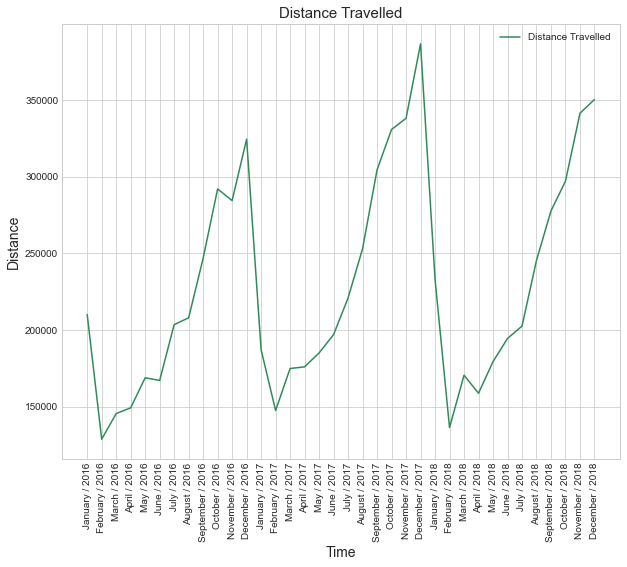

In [46]:
plt.figure(figsize=(10,8))
plt.plot(dist_by_month['Month-Year'], dist_by_month['KM Travelled'], label='Distance Travelled', color='SeaGreen')
plt.title('Distance Travelled', fontsize=15)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

We can detect the strong relationship visually on the graph as well, but it is not what we had expected. February seems to be the least busy time for cab drivers, then the travelling starts increasing during summer months.  The busiest time seems to be the months of November and December, which makes sense since people do their Christmas shopping during these months and travel more during Thanksgiving and Christmas Holidays.  


Since we established the fact that November and December are the most profitable months of the year, let us take a look at the profits made by each cab company during these months.

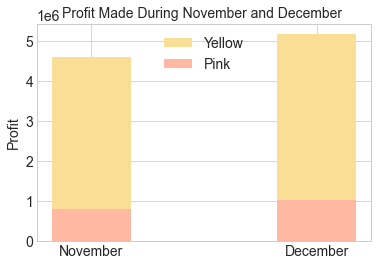

During the month of November, Yellow Cab's profit is 5.7 times that of Pink Cab's.
During the month of December, Yellow Cab's profit is 5.0 times that of Pink Cab's.


In [83]:
yellow_profit_nov = df[(df['Company']=='Yellow Cab')&(df['Month']==11)]['Profit'].sum()
yellow_profit_dec = df[(df['Company']=='Yellow Cab')&(df['Month']==12)]['Profit'].sum()
pink_profit_nov = df[(df['Company']=='Pink Cab')&(df['Month']==11)]['Profit'].sum()
pink_profit_dec = df[(df['Company']=='Pink Cab')&(df['Month']==12)]['Profit'].sum()

x=['November',  'December']
width=0.35
fig, ax = plt.subplots()
ax.bar(width=width,height= [yellow_profit_nov, yellow_profit_dec],x=x,label='Yellow', color='#F8DF95', align='center')
ax.bar(width=width, height=[pink_profit_nov,pink_profit_dec],x=x,
       label='Pink',color='#FFB8A1', align='center')

ax.set_ylabel('Profit')
ax.set_title('Profit Made During November and December ')

ax.legend(loc='upper center')
plt.rcParams.update({'font.size':13})

plt.show()
print('During the month of November, Yellow Cab\'s profit is {} times that of Pink Cab\'s.'.format(str((yellow_profit_nov/pink_profit_nov).round(1))))
print('During the month of December, Yellow Cab\'s profit is {} times that of Pink Cab\'s.'.format(str((yellow_profit_dec/pink_profit_dec).round(1))))


We see that Yellow Cab's profit is around 5 times that of Pink Cab's during the busiest months. So, we would recommend XYZ company to invest in Yellow Cab Company.

## Hypothesis 4: Which company dominates the industry?
From our experience, we feel like yellow cabs are more ubiquitous in the US than the pink cabs. In this section, we will explore whether Yellow Cab Company dominates the industry.

Let us see what percentage of the transaction comes from each company:

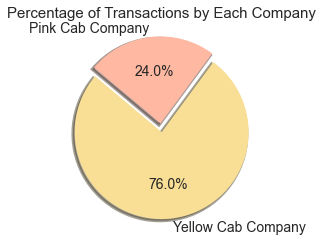

In [86]:
company_share = df['Company'].value_counts(normalize=True).round(2)*100
plt.pie(company_share, colors = ['#F8DF95', '#FFB8A1'], labels=['Yellow Cab Company', 'Pink Cab Company'],autopct='%1.1f%%', 
        shadow=True, startangle=140,wedgeprops = {'linewidth': 3}, explode=(0, 0.1),textprops={'fontsize': 14})
plt.title('Percentage of Transactions by Each Company', fontsize=15)
plt.show()

From the pie chart, we see that only about one fourth of the transactions come from the Pink cab company.

In [40]:
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Profit,Year,Month
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-21,281.28,2018,7
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-23,194.65,2018,11
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-21,253.98,2018,4
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash,Male,27,9237,2018-05-04,50.89,2018,5
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card,Male,27,9237,2018-10-27,25.10,2018,10


We would like to know whether these companies operate in the same cities:

In [41]:
yellow = df[df['Company']=='Yellow Cab'].copy()
pink = df[df['Company']=='Pink Cab'].copy()
yellow.City.value_counts().index.sort_values()==pink.City.value_counts().index.sort_values()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

So, both companies are invested in all of the cities the dataset provides.

Let us see how profit is shared by these companies in each city: 

In [87]:
profit_comp_city = df.groupby(['City','Company'])['Profit'].sum().reset_index()
#profit_comp_city['Profit'].value_counts(normalize=True)
profit_comp_city['Perc_Profit'] = (profit_comp_city['Profit']/profit_comp_city.groupby('City')['Profit'].transform('sum')).round(2)*100
profit_comp_city.head()

,City,Company,Profit,Perc_Profit
0,ATLANTA GA,Pink Cab,94788.89,12.0
1,ATLANTA GA,Yellow Cab,726111.47,88.0
2,AUSTIN TX,Pink Cab,147035.77,28.0
3,AUSTIN TX,Yellow Cab,373479.35,72.0
4,BOSTON MA,Pink Cab,259418.20,15.0


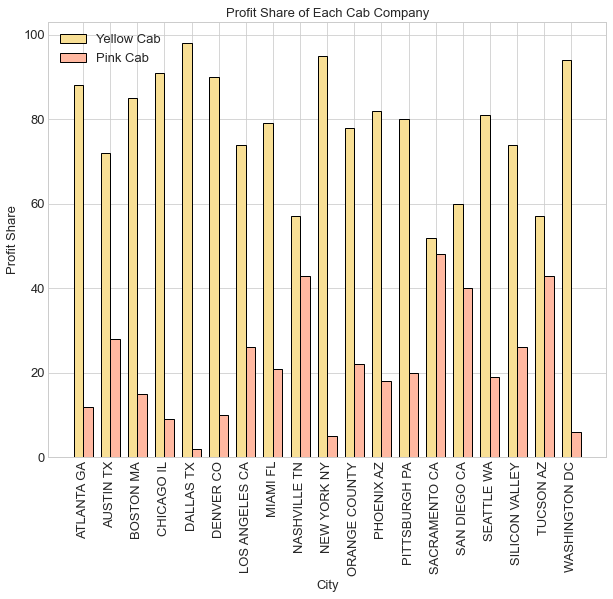

In [88]:
N=19
ind=np.arange(N)
width = 0.35       # the width of the bars
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
yellow = ax.bar(ind, profit_comp_city[profit_comp_city['Company']=='Yellow Cab']['Perc_Profit'], width, color='#F8DF95', edgecolor='black')

pink = ax.bar(ind+width,profit_comp_city[profit_comp_city['Company']=='Pink Cab']['Perc_Profit'], width, color='#FFB8A1', edgecolor='black')

# add some
ax.set_xlabel('City')
ax.set_ylabel('Profit Share')
ax.set_title('Profit Share of Each Cab Company')
ax.set_xticks(ind + width / 2)
xticks = profit_comp_city['City'].drop_duplicates()
ax.set_xticklabels((xticks))

ax.legend( (yellow[0], pink[0]), ('Yellow Cab', 'Pink Cab'), framealpha=0.5 , loc='best')
plt.xticks(rotation=90)
plt.show()

In all of the cities, Yellow Cab Company has the bigger share of the profit. Based on our analysis, we proved the hypothesis that the Yellow Cab Company dominates the industry. Based on this analysis, we would recommend XYZ company to invest in the Yellow Cab Company.

## Hypothesis 5: Which Company's Customers are More Loyal?

We would like to investigate the loyalty of the customer base of each company. Customer loyalty is a huge indicator of a company's success. So we will recommend XYZ company to invest in the cab company with higher customer loyalty. To do this, we need to find out the returning customer rate for each company.

We will split the dataset based on the cab company and then find out the frequency of each customer using the service of each company.

In [89]:
yellow = df[df['Company']=='Yellow Cab'].copy()
pink = df[df['Company']=='Pink Cab'].copy()

In [90]:
yellow_service=yellow['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID', 'Customer ID':'Service Times'})
pink_service = pink['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID', 'Customer ID':'Service Times'})
yellow_service.head()

,Customer ID,Service Times
0,1360,47
1,494,47
2,636,46
3,1803,46
4,903,45


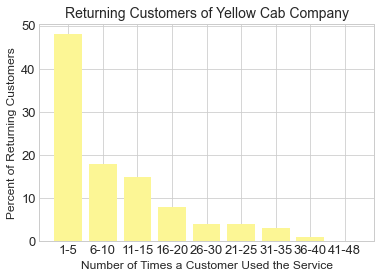

,Number of Returns,Number of Customers,Percent of the Customers
0,1-5,13167,48.0
1,6-10,4999,18.0
2,11-15,4199,15.0
3,16-20,2145,8.0
4,26-30,1096,4.0
5,21-25,1075,4.0
6,31-35,785,3.0
7,36-40,209,1.0
8,41-48,36,0.0


In [93]:
yellow_service['Service Brackets'] = pd.cut(x=yellow_service['Service Times'],
                                            bins=[1,5,10,15,20,25,30,35,40,48],
                                            labels=['1-5','6-10','11-15','16-20', '21-25','26-30','31-35','36-40','41-48'])
yellow_value_count = yellow_service['Service Brackets'].value_counts().reset_index()
yellow_value_count.rename(columns={'index':'Number of Returns', 'Service Brackets':'Number of Customers'}, inplace=True)
yellow_value_count['Percent of the Customers'] = ((yellow_value_count['Number of Customers']/yellow_value_count['Number of Customers'].sum()).round(2))*100
plt.bar(height=yellow_value_count['Percent of the Customers'],x=yellow_value_count['Number of Returns'], color='#FCF695')
plt.title('Returning Customers of Yellow Cab Company', fontsize=14)
plt.ylabel('Percent of Returning Customers', fontsize=12)
plt.xlabel('Number of Times a Customer Used the Service', fontsize=12)
plt.show()
yellow_value_count

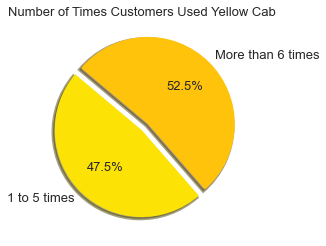

In [94]:
one_five=yellow_value_count['Number of Customers'].iloc[0]
rest = yellow_value_count['Number of Customers'].sum() - one_five
data=pd.DataFrame([one_five, rest])
labels=['1 to 5 times', 'More than 6 times']
data
plt.pie(data[0], colors = ['#fce305','#ffc30b'], labels=labels,autopct='%1.1f%%', 
        shadow=True, startangle=140,wedgeprops = {'linewidth': 3}, explode=(0, 0.1))
plt.title('Number of Times Customers Used Yellow Cab')
plt.show()

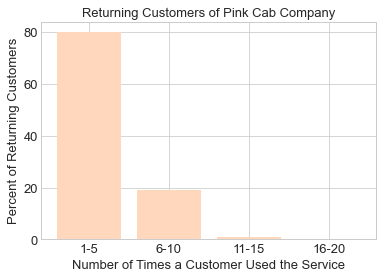

,Number of Returns,Number of Customers,Percent of the Customers
0,1-5,14239,80.0
1,6-10,3393,19.0
2,11-15,218,1.0
3,16-20,7,0.0


In [95]:
pink_service['Service Brackets'] = pd.cut(x=pink_service['Service Times'],
                                          bins=[1,5,10,15,20],
                                          labels=['1-5','6-10','11-15','16-20'])
pink_service.head()
#plt.bar(height=yellow_service['Service Brackets'].value_counts(),)
pink_value_count = pink_service['Service Brackets'].value_counts().reset_index()
pink_value_count.rename(columns={'index':'Number of Returns', 'Service Brackets':'Number of Customers'}, inplace=True)
pink_value_count['Percent of the Customers'] = ((pink_value_count['Number of Customers']/pink_value_count['Number of Customers'].sum()).round(2))*100
plt.bar(height=pink_value_count['Percent of the Customers'],x=pink_value_count['Number of Returns'], color='#FFD7BC')
plt.title('Returning Customers of Pink Cab Company')
plt.ylabel('Percent of Returning Customers')
plt.xlabel('Number of Times a Customer Used the Service')
plt.show()
pink_value_count

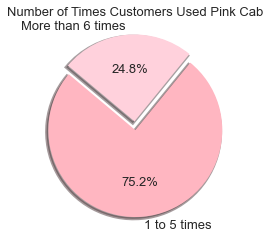

In [105]:
one_five_pink=pink_value_count['Number of Customers'].iloc[0]
rest_pink = pink_value_count['Number of Customers'].sum() - one_five
data_pink=pd.DataFrame([one_five_pink, rest_pink])
labels=['1 to 5 times', 'More than 6 times']
data
plt.pie(data_pink[0], colors = ['LightPink','#ffd1dc'], labels=labels,autopct='%1.1f%%', 
        shadow=True, startangle=140,wedgeprops = {'linewidth': 3}, explode=(0, 0.1))
plt.title('Number of Times Customers Used Pink Cab')
plt.show()

Around 80% of the customer base of the Pink Cab Company used the service 1 to 5 times. Only 20% of the customer base used the service more than six times. On the other hand, 47% of the customer base of Yellow Cab used the service 1 to 5 times and 53% of the customer base used the service more than six times. It seems like Yellow Cab company's customers are much more loyal to the company than Pink Cab Company's customers. We would recommend XYZ company to invest in the Yellow Cab Company based on this result.

## Hypothesis 6:  Do People Earning More Bring in More Profit?
We believe higher portion of the profit would come from people whose income are in the higher bracket. If this is indeed true based on the data, we will find out which company attracts more people in this income bracket, then we will make our recommendation based on that. 

Let us divide the income column into quartiles. 

In [106]:
np.percentile(df['Income (USD/Month)'], q=[0,25, 50, 75,100])

array([ 2000.,  8424., 14682., 21034., 35000.])

In [107]:
df['Income Brackets'] = pd.cut(x=df['Income (USD/Month)'], bins=[2000,8424, 14682, 21034, 35000],
                                              labels=['0-25%', '26%-50%','51%-75%','76%-100%'])
df.head(50)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Profit,Year,Month,Income Brackets
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-21,281.28,2018,7,26%-50%
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-23,194.65,2018,11,26%-50%
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-21,253.98,2018,4,26%-50%
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701,27703,Cash,Male,27,9237,2018-05-04,50.89,2018,5,26%-50%
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,814885,24701,27703,Card,Male,27,9237,2018-10-27,25.10,2018,10,26%-50%
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,814885,24701,28712,Card,Male,53,11242,2016-09-21,210.09,2016,9,26%-50%
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,814885,24701,28712,Card,Male,53,11242,2017-06-23,118.97,2017,6,26%-50%
10,10320493,Yellow Cab,ATLANTA GA,19.38,326.35,272.0952,814885,24701,28712,Cash,Male,53,11242,2018-04-21,54.25,2018,4,26%-50%
12,10094994,Pink Cab,ATLANTA GA,41.44,522.14,484.8480,814885,24701,28020,Cash,Male,23,23327,2016-10-27,37.29,2016,10,76%-100%
13,10140112,Yellow Cab,ATLANTA GA,24.72,515.66,323.3376,814885,24701,28020,Card,Male,23,23327,2017-01-27,192.32,2017,1,76%-100%


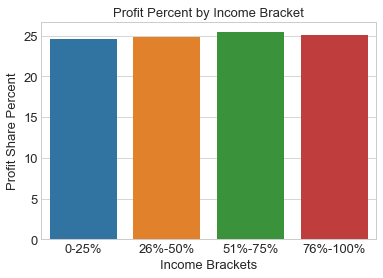

,Income Brackets,Profit,Profit Share
0,0-25%,11929743.28,24.603402
1,26%-50%,12073972.58,24.900855
2,51%-75%,12330610.57,25.430134
3,76%-100%,12153859.24,25.065609


In [108]:
profit_by_income = df.groupby('Income Brackets')['Profit'].sum().reset_index()
profit_by_income['Profit Share'] = (profit_by_income['Profit']/profit_by_income['Profit'].sum())*100
sns.barplot(x='Income Brackets', y='Profit Share', data=profit_by_income)
plt.title('Profit Percent by Income Bracket')
plt.ylabel('Profit Share Percent')
plt.show()
profit_by_income

There is a slight increase in the 51%-75% quartile, but the difference is not enough to claim that income differences affect profit.

Now, let us see if this is true across all cities:

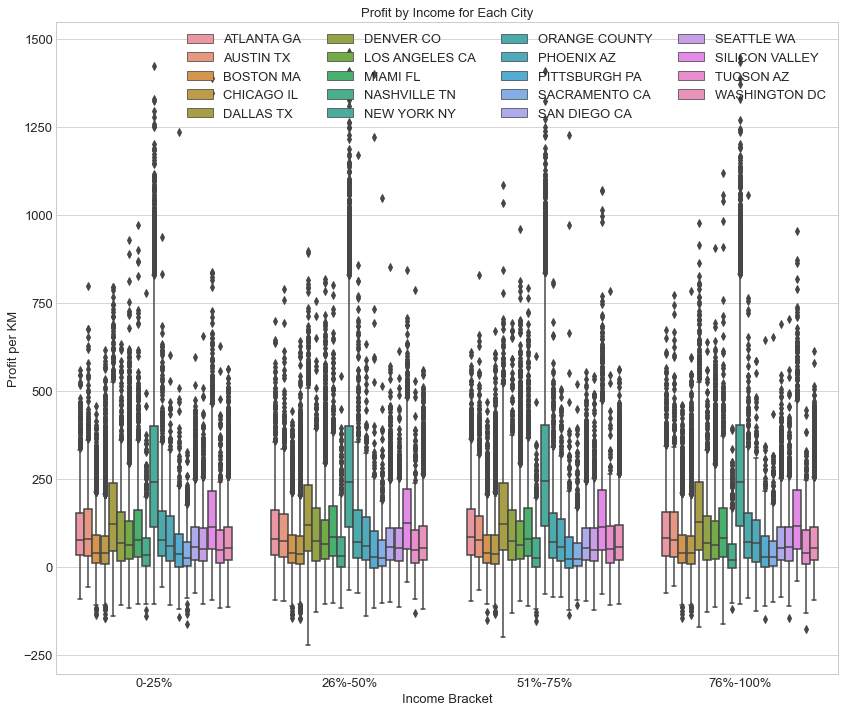

In [115]:

fig=plt.figure(figsize=(14, 12))
sns.boxplot(x='Income Brackets', y='Profit',hue='City', data=df)
plt.title('Profit by Income for Each City')
plt.xlabel('Income Bracket')
plt.ylabel('Profit per KM')
plt.legend(ncol=4)
plt.show()

From the graph, again we see no correlation between income and profit.
So we can not make a recommendation to XYZ company on which company to invest based on the income brackets of the customers.

## Hypothesis 7: Do People Earning More Use Cabs More Frequently?

People in higher income brackets may use the cab service more frequently than people in lower income brackets. Let us see if this is true.

In [117]:
service=df['Customer ID'].value_counts().reset_index().rename(columns={'index':'Customer ID', 'Customer ID':'Service Times'})
return_service = pd.merge(service, df, on='Customer ID', how='outer')
ret_service = return_service[['Customer ID', 'Service Times', 'Income Brackets']].copy()
ret_service.drop_duplicates(inplace=True)
ret_service.head()

,Customer ID,Service Times,Income Brackets
0,494,54,51%-75%
54,2939,53,0-25%
107,2766,50,0-25%
157,126,50,26%-50%
207,1070,50,0-25%


In [118]:
average_by_income = ret_service.groupby('Income Brackets')['Service Times'].mean().round(2).reset_index()
average_by_income

,Income Brackets,Service Times
0,0-25%,7.57
1,26%-50%,7.80
2,51%-75%,7.77
3,76%-100%,7.73


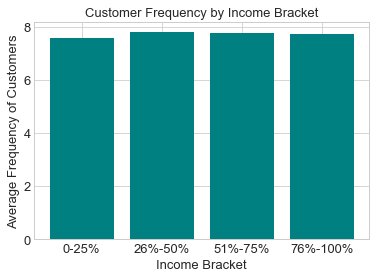

In [119]:
plt.bar(height=average_by_income['Service Times'], x=average_by_income['Income Brackets'], color='Teal')
plt.title('Customer Frequency by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Frequency of Customers')
plt.show()

Across all income brackets, on average, a customer uses the cab service around seven times. There seems to be no relationship between a customer's income and how frequently they use the service. So, we can not make a recommendation based on this either.

## Conclusion:
Based on the analysis we made, we would definitely recommend XYZ company to invest in the Yellow Cab Company.